In [392]:
import sys
print("Python Version")
print(sys.version)

Python Version
3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [393]:
#%matplotlib ipympl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [493]:
np.set_printoptions(suppress=True)

In [394]:
import imageio

In [395]:
import math

In [396]:
terrain = imageio.imread("bw_map_50px.png")

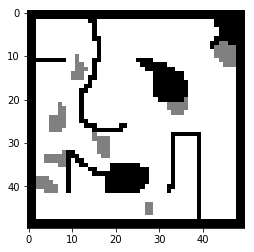

In [397]:
plt.imshow(terrain,cmap=plt.cm.gray)

In [398]:
def rand_point(terrain):
    h,w = terrain.shape
    return np.floor(np.random.rand(2) * (w,h)).astype("int")

In [399]:
def rand_points(terrain, num_points):
    points = []
    while len(points) < num_points:
        point = rand_point(terrain)
        if terrain[point[1],point[0]] > 0:
            points.append(point)
    points = np.array(points)
    return points

In [400]:
num_points = 4
points = rand_points(terrain, num_points)

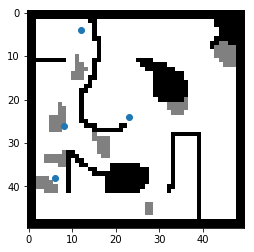

In [401]:
plt.imshow(terrain,cmap=plt.cm.gray)
plt.plot(points[:,0],points[:,1],"o")

In [402]:
def distance(A,B):
    x0,y0=A
    x1,y1=B
    dx,dy=x0-x1,y0-y1
    return math.sqrt(dx*dx+dy*dy)

In [403]:
distances = np.array([
    [
        distance(A,B)
        for B in points
    ]
    for A in points
])

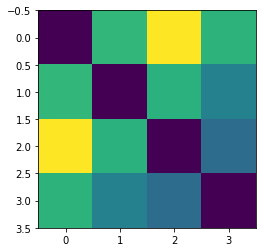

In [404]:
plt.imshow(distances)

In [405]:
def cost_map(terrain_costs, point):
    h,w = terrain_costs.shape
    cost = np.zeros(terrain_costs.shape, dtype=float)
    cost[:,:] = np.infty
    visited = np.zeros(terrain_costs.shape, dtype=bool)
    stack = [point]
    cost[point[1],point[0]] = 0
    neighbor_offsets = np.array([
        [dx,dy] 
        for dx in [-1,0,1]
        for dy in [-1,0,1]
        if not ((dx == 0) and (dy == 0))
    ])
    #print(neighbor_offsets)
    k=0
    while len(stack)>0:
        #plt.imshow(cost)
        #plt.plot(np.array(stack)[:,0],np.array(stack)[:,1],"o")
        x,y = stack.pop()
        if visited[y,x]: continue
        visited[y,x] = True
        neighbors = [
            [x+dx,y+dy]
            for dx,dy in neighbor_offsets
            if 0 <= x+dx < w 
            and 0 <= y+dy < h
            and terrain_costs[y+dy,x+dx] < np.infty
        ]
        for nx,ny in neighbors:
            stack.append((nx,ny))
            if cost[y,x] + terrain_costs[ny,nx] < cost[ny,nx]:
                cost[ny,nx] = cost[y,x] + terrain_costs[ny,nx]
                
    return cost

In [525]:
terrain_costs = np.zeros(terrain.shape, float)
terrain_costs[:,:] = np.infty
terrain_costs[terrain == 0] = np.infty
terrain_costs[terrain == 128] = 0
terrain_costs[terrain == 255] = 1

In [526]:
cost_maps = np.array([
    cost_map(terrain_costs, point)
    for point in points
])

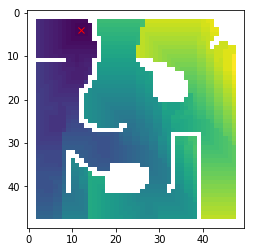

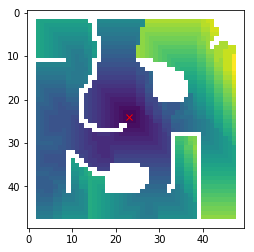

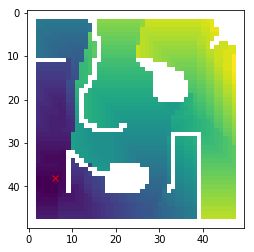

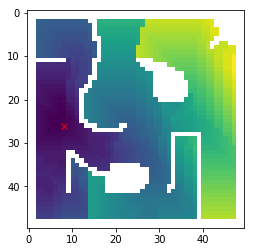

In [527]:
for cost, point in zip(cost_maps, points):
    plt.figure()
    plt.imshow(cost)
    plt.plot(point[0],point[1],"x",color="red")


In [528]:
def compute_voronoi(cost_maps):
    idcs = np.argmin(cost_maps,axis=0)
    idcs[cost_maps.min(axis=0) == np.infty] = -1
    return idcs

In [529]:
voronoi = compute_voronoi(cost_maps)

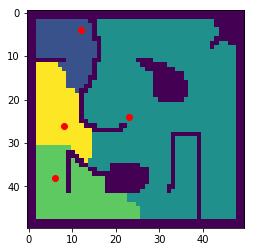

In [530]:
plt.imshow(voronoi)
plt.plot(points[:,0],points[:,1],"o",color="red")

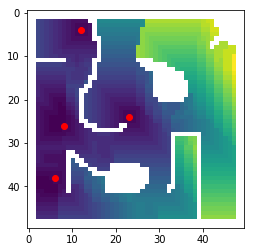

In [531]:
plt.imshow(cost_maps.min(axis=0))
plt.plot(points[:,0],points[:,1],"o",color="red")

In [532]:
def comute_voronoi_neighbors(indices):
    h,w = indices.shape
    neighbor_offsets = np.array([
        [dx,dy] 
        for dx in [-1,0,1]
        for dy in [-1,0,1]
        if not ((dx == 0) and (dy == 0))
    ])
    neighbors = dict()
    for k in range(0,indices.max()+1):
        neighbors[k] = set()
    for y in range(0,h):
        for x in range(0,w):
            if indices[y,x] < 0: continue
            for dx,dy in neighbor_offsets:
                if ((0 <= x+dx < w)
                    and (0 <= y+dy < h)
                    and (indices[y+dy,x+dx] >= 0)
                    and (indices[y+dy,x+dx] != indices[y,x])):
                    
                    neighbors[indices[y,x]].add(indices[y+dy,x+dx])
    return neighbors

In [533]:
voronoi_neighbors = comute_voronoi_neighbors(voronoi)

In [534]:
ddd.union()

{2}

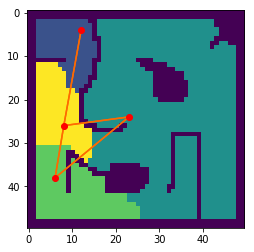

In [535]:
plt.imshow(voronoi)
for k,idcs in voronoi_neighbors.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
plt.plot(points[:,0],points[:,1],"o",color="red")


In [430]:
produce = (np.random.rand(num_points) < 0.5) * np.random.uniform(5,15,num_points)

In [431]:
consume = (np.random.rand(num_points) < 0.5) * np.random.uniform(5,15,num_points)

In [494]:
produce, consume

(array([ 5.28382539,  0.        ,  5.35637437, 14.07495814]),
 array([14.6120588 , 11.69120679,  0.        ,  0.        ]))

In [451]:
surplus = produce - consume

In [452]:
surplus

array([ -9.32823341, -11.69120679,   5.35637437,  14.07495814])

In [449]:
produce.sum(), consume.sum()

(24.71515790798594, 26.303265589380665)

In [453]:
surplus.sum()

-1.5881076813947264

In [457]:
if surplus.sum() < 0:
    granted = consume + surplus.sum() / consume.shape[0]
else:
    granted = consume

In [460]:
flux = produce - granted

In [461]:
flux

array([ -8.93120649, -11.29417987,   5.75340129,  14.47198506])

In [508]:
transport = np.zeros((num_points,num_points))

In [490]:
transport[3,0] = 8.93


In [509]:
received = transport.sum(axis=0)
sent = transport.sum(axis=1)
available = received - sent + flux

In [510]:
received,sent,available

(array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([ -8.93120649, -11.29417987,   5.75340129,  14.47198506]))

In [ ]:
while available.max() > 0:
    for k,available_ in enumerate(available):
        if available_ > 0:
            
    received = transport.sum(axis=0)
    sent = transport.sum(axis=1)
    available = received - sent + flux

In [ ]:
for k, flux_ in enumerate(flux):
    available = flux - transport.sum(axis=0) + transport.sum(axis=1)
    if flux_ < 0:
        # we need
    else:
        # we have

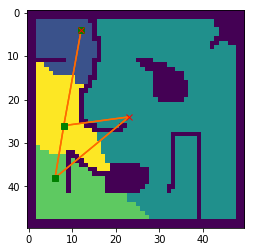

In [447]:
plt.imshow(voronoi)
for k,idcs in voronoi_neighbors.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
plt.plot(points[produce > 0,0],points[produce > 0,1],"s",color="green")
plt.plot(points[consume > 0,0],points[consume > 0,1],"x",color="red")


In [448]:
voronoi_neighbors

{0: {3}, 1: {2, 3}, 2: {1, 3}, 3: {0, 1, 2}}

In [506]:
gradients = {}
for key,neighbors in voronoi_neighbors.items():
    gradients[key] = dict()
    for idx in neighbors:
        gradients[key][idx] = flux[key]+flux[idx]

In [507]:
gradients

{0: {3: 5.540778571914155},
 1: {2: -5.5407785719141565, 3: 3.177805195205531},
 2: {1: -5.5407785719141565, 3: 20.225386354359685},
 3: {0: 5.540778571914155, 1: 3.177805195205531, 2: 20.225386354359685}}

In [ ]:
def find_path()